# Tarea Minería de Datos

## 1. Definir el problema y Objetivos

#### El objetivo es predecir si un estudiante aprobará o no el examen final en función de las variables.

### Descripción del Dataset

- Student_ID: Identificador del estudiante (no es relevante para el análisis).

- Gender: Género del estudiante.
- Study_Hours_per_Week: Horas de estudio a la semana.
- Attendance_Rate: Porcentaje de asistencia.
- Past_Exam_Scores: Nota de exámenes anteriores.
- Parental_Education_Level: Nivel educativo de los padres.
- Internet_Access_at_Home: Si tiene acceso a Internet en casa (Yes o No).
- Extracurricular_Activities: Si realiza actividades extracurriculares (Yes o No).
- Final_Exam_Score: Nota del examen final.
- Pass_Fail: Etiqueta de si el estudiante aprobó (Pass) o reprobó (Fail).

## 2. Búsqueda y Adquisición de Datos

#### El dataset utilizado es el student_performance_dataset.csv, encontrado en Kaggle

https://www.kaggle.com/datasets/amrmaree/student-performance-prediction?resource=download

## 3. Preparar el entorno de trabajo



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Otro algoritmo
from sklearn.ensemble import RandomForestClassifier

## 4. Exploración de Datos (Data Exploration)

#### Carga de datos

In [ ]:
df = pd.read_csv("student_performance_dataset.csv")
df.head() # Visualiza las primeras filas


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


#### Análisis descriptivo

In [67]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


### Visualización inicial

#### Distribuciones

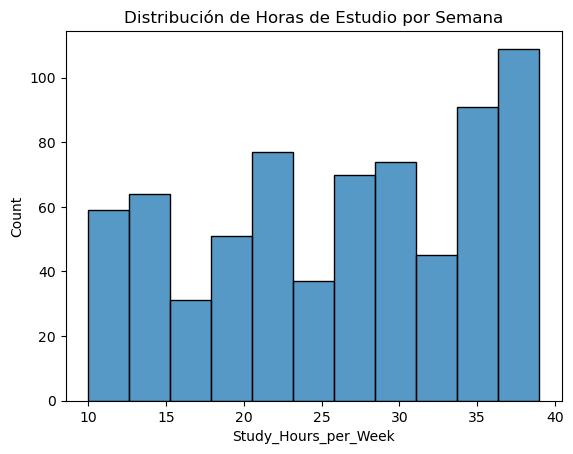

In [68]:
sns.histplot(df['Study_Hours_per_Week'])
# plt.title("Distribución de Horas de Estudio")
plt.title("Distribución de Horas de Estudio por Semana")
plt.show()

#### Relaciones

- Relación entre horas de estudio y aprobación

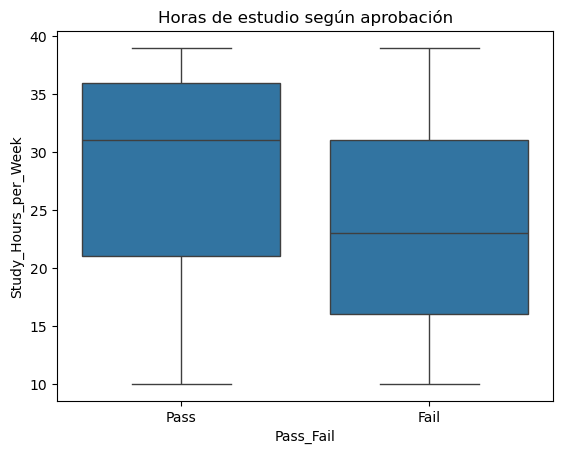

In [69]:
sns.boxplot(x='Pass_Fail', y='Study_Hours_per_Week', data=df)
plt.title("Horas de estudio según aprobación")
plt.show()

- Relación entre asistencia y aprobación

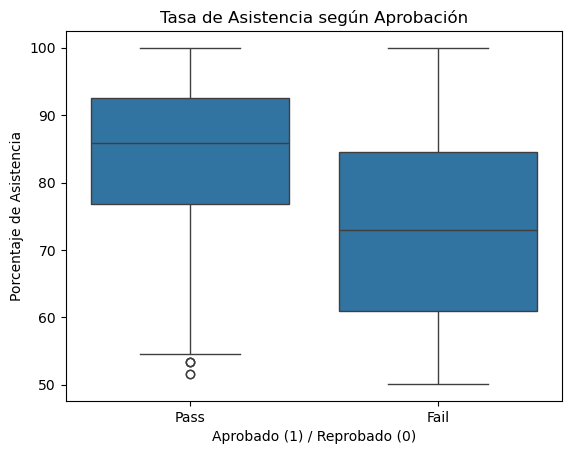

In [70]:
sns.boxplot(x='Pass_Fail', y='Attendance_Rate', data=df)
plt.title("Tasa de Asistencia según Aprobación")
plt.xlabel("Aprobado (1) / Reprobado (0)")
plt.ylabel("Porcentaje de Asistencia")
plt.show()

## 5. Preprocesamiento de Datos

#### Limpieza

- Revisar valores nulos e inconsistentes

In [71]:
df.isnull().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

#### Transformación

- Convierte variables categóricas a numéricas (codificación).

In [72]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Internet_Access_at_Home"] = df["Internet_Access_at_Home"].map({"Yes": 1, "No": 0})
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map({"Yes": 1, "No": 0})
df = pd.get_dummies(df, columns=["Parental_Education_Level"], drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Student_ID                            708 non-null    object 
 1   Gender                                708 non-null    int64  
 2   Study_Hours_per_Week                  708 non-null    int64  
 3   Attendance_Rate                       708 non-null    float64
 4   Past_Exam_Scores                      708 non-null    int64  
 5   Internet_Access_at_Home               708 non-null    int64  
 6   Extracurricular_Activities            708 non-null    int64  
 7   Final_Exam_Score                      708 non-null    int64  
 8   Pass_Fail                             708 non-null    object 
 9   Parental_Education_Level_High School  708 non-null    bool   
 10  Parental_Education_Level_Masters      708 non-null    bool   
 11  Parental_Education_

#### Selección de características

- Escoge las columnas relevantes para tu análisis

In [73]:
features = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores']
target = 'Pass_Fail'
X = df[features]
y = df[target]

## 6. División del Conjunto de Datos

#### División en entrenamiento y prueba

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 7. Modelado

#### Selección del algoritmo

In [75]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## 8. Evaluación del modelo

#### Predicciones y análisis de resultados

In [76]:
y_pred = model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.7981220657276995
              precision    recall  f1-score   support

        Fail       0.79      0.82      0.81       108
        Pass       0.81      0.77      0.79       105

    accuracy                           0.80       213
   macro avg       0.80      0.80      0.80       213
weighted avg       0.80      0.80      0.80       213



#### Matriz de confusión

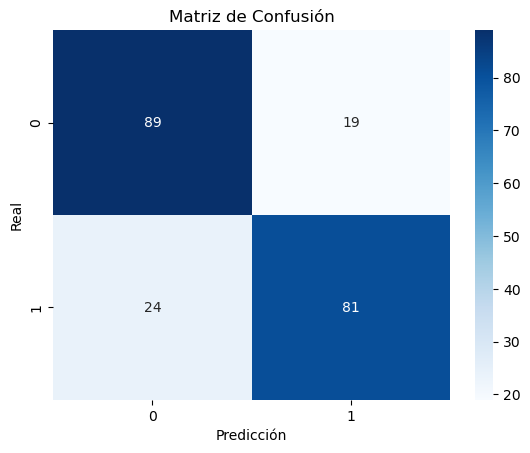

In [77]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## 9. Interpretación y conclusiones

#### ¿Cuál es la precisión del modelo?

- La precisión es del 79%, redondeado a 80%.

#### ¿Qué variables parecen tener mayor influencia según el modelo?

- Past_Exam_Scores: Los estudiantes con mejores notas previas tienen más probabilidad de aprobar.

- Study_Hours_per_Week: Los estudiantes que estudian más tienen más probabilidades de aprobar.

- Attendance_Rate: Los estudiantes con más asistencia suelen obtener mejores resultados.

#### Discute las limitaciones y posibles mejoras (más datos, otros algoritmos, etc.)

- Se podrían añadir mas variables, como Parental_Education_Level o Internet_Access_at_Home, que serían adecuadas para conocer más el contexto de los estudiantes.

- Otra mejora sería implementar Random Forest para capturar relaciones más complejas (aunque es más lento y puede sobreajustarse) o ajustando hiperparámetros.

Ejemplo con Random Forest:

Precisión del modelo Random Forest: 0.8967136150234741
              precision    recall  f1-score   support

        Fail       0.95      0.84      0.89       108
        Pass       0.85      0.95      0.90       105

    accuracy                           0.90       213
   macro avg       0.90      0.90      0.90       213
weighted avg       0.90      0.90      0.90       213



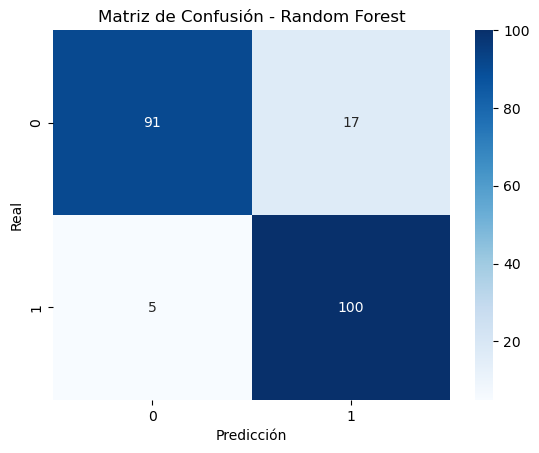

In [78]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones con el modelo Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo Random Forest
print("Precisión del modelo Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Como se puede observar, se obtiene una precisión del 90%, claramente superior a la Regresión Logística.

---------------------------------------------